In [3]:
import pandas as pd
import numpy as np, os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/features/128' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]

# Initialize an empty DataFrame to concatenate all data
all_data = pd.DataFrame()
all_data_list = []
# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

# Pre process

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Handling class imbalance
#smote = SMOTE()
X, y = smote.fit_resample(all_data.drop(columns='annotation'), all_data['annotation'])

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

'''

# Hyperparameter tuning (example with GridSearch)
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Re-evaluate with the best model
best_predictions = best_model.predict(X_test)
print(classification_report(y_test, best_predictions))
'''

              precision    recall  f1-score   support

           N       0.98      0.96      0.97     18495
           S       0.98      0.98      0.98     18761
           V       0.97      0.99      0.98     18588

    accuracy                           0.98     55844
   macro avg       0.98      0.98      0.98     55844
weighted avg       0.98      0.98      0.98     55844

[[17690   351   454]
 [  145 18460   156]
 [  147   114 18327]]


"\n\n# Hyperparameter tuning (example with GridSearch)\nparam_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}\ngrid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\nbest_model = grid_search.best_estimator_\n\n# Re-evaluate with the best model\nbest_predictions = best_model.predict(X_test)\nprint(classification_report(y_test, best_predictions))\n"

In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

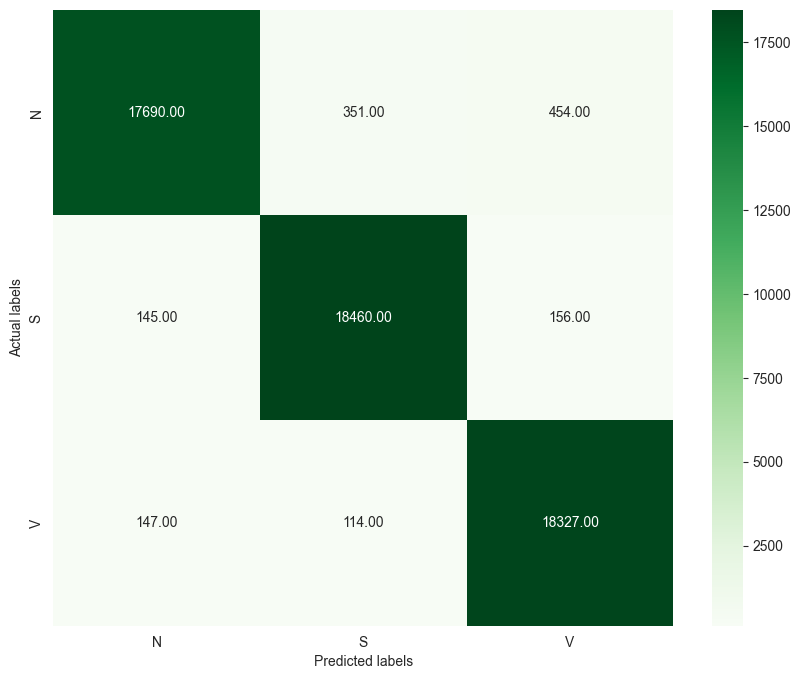

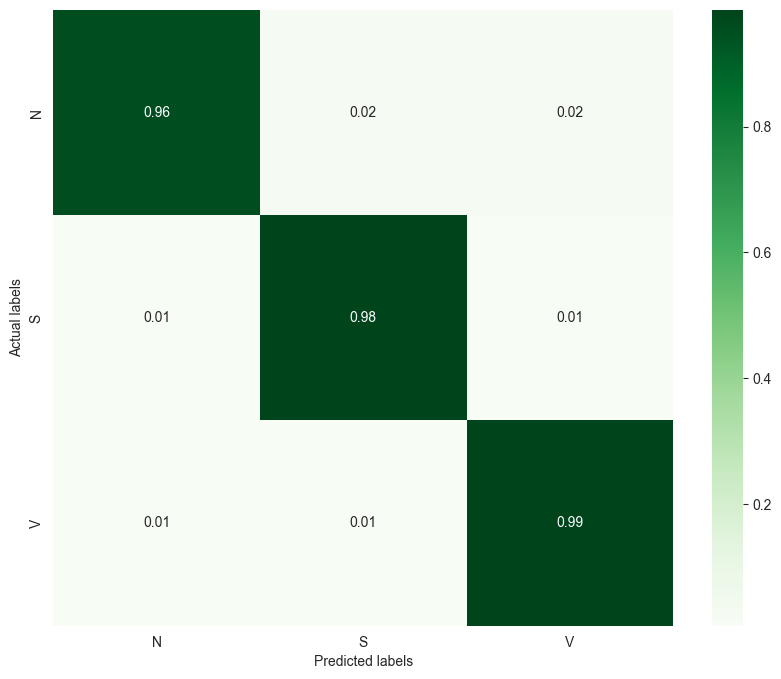

In [7]:
classes_name = ['N', 'S', 'V']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()
#Normalized cm

cm.sum(axis=1)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()